In [13]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

## Dataset

In [14]:
DATA_ROOT = '/Users/mpekey/Desktop/Mert_SabanciUniv/CS518/HoneyPollenClassification/dataset_resized'

In [8]:
def get_pollen_family(pollen_type):

    if pollen_type in ['Acanthus dioscoridis', 'Acanthus sp']:
        return 'Acanthaceae'
    elif pollen_type in ['Sambucus ebulus', 'Sambucus nigra', 'Viburnum lantana','Viburnum lanata']:
        return 'Adoxaceae'
    elif pollen_type in ['Chenopodium foliosum','Amaranthaceae sp']:
        return 'Amaranthaceae'
    elif pollen_type in ['Allium rotundum', 'Allium ampeloprasum', 'Allium sp']:
        return 'Amaryllidaceae'
    elif pollen_type in ['Cotinus coggygria', 'Rhus coriaria', 'Rhus sp']:
        return 'Anacardiaceae'
    elif pollen_type in ['Eryngium campestre', 'Ferula orientalis', 'Malabaila lasiocarpa', 'Lecokia cretica', 'Pimpinella sp','Apiaceae sp']:
        return 'Apiaceae'
    elif pollen_type in ['Leopoldia tenuiflora','Ornithogalum narbonense','Muscari tenuifolium']:
        return 'Asparagaceae'
    elif pollen_type in ['Gundelia sp','Circium arvense','Centaurea urvellei','Cardus','Matricaria chamomila','Scorzonera latifolia','Asteraceae sp','Artemisia absinthium','Achillea arabica', 'Achilla arabica', 'Achillea millefolium', 'Achillea vermicularis','Anthemis cretica','Arctium minus','Arctium minus','Bellis perennis',
    'Carduus nutans','Centaurea bingoelensis','Centaurea iberica','Centaurea kurdica','Centaurea saligna','Centaurea solstitialis','Centaurea spectabilis',
    'Centaurea urvillei','Centaurea virgata','Chondrilla brevirostris','Chondrilla juncea','Cichorium intybus','Cirsium arvense','Cirsium yildizianum',
    'Cota altissima','Crepis sancta','Cyanus triumfettii','Echinops pungens','Gundelia tournefortii','Helichrysum arenarium','Helichrysum plicatum',
    'Iranecio eriospermus','Senecio eriospermus','Matricaria chamomilla','Onopordum acanthium','Onopordum acanthium','Tanacetum balsamita','Tanacetum zahlbruckneri',
    'Taraxacum campylodes','Taraxacum officinale','Tussilago farfara','Xeranthemum annuum','Xeranthemum longipapposum','Artemisia sp','Carduus sp','Centaurea sp',
    'Cichorium sp','Cirsium sp','Cirsium yildizianum','Echinops sp','Echinops sp','Helianthus sp','Helichrysum sp','Onopordum sp','Ptilostemon sp','Xanthium sp','Xeranthemum sp','Xeranthemum longipopposum','Xeranthemum annum']:
        return 'Asteraceae'
    elif pollen_type in ['Alkanna orientalis','Anchusa azurea','Anchusa leptophylla','Cerinthe minor','Echium italicum','Myosotis alpestris','Myosotis laxa','Myosotis stricta','Myosotis sylvatica','cyanea','Phyllocara aucheri','Anchusa sp','Echium sp']:
        return 'Boraginaceae'
    elif pollen_type in ['Capsella bursa pastoris','Aethionema grandiflorum', 'Capsella bursa-pastoris', 'Isatis glauca','Lepidium draba','Raphanus raphanistrum']:
        return 'Brassicaceae'
    elif pollen_type in ['Campanula glomerata','Campanula involucrata', 'Campanula propinqua','Campanula stricta', 'stricta', 'Campanula sp']:
        return 'Campanulaceae'
    elif pollen_type in ['Centranthus longifolius','Centranthus longiflorus', 'Morina persica', 'Scabiosa columbaria', 'Scabiosa rotata', 'Cephalaria sp', 'Scabiosa sp', 'Valeriana sp']:
        return 'Caprifoliaceae'
    elif pollen_type in ['Cerastium armeniacum', 'Saponaria prostrata', 'Saponaria viscosa', 'Saponaria viscosa', 'Silene spergulifolia','Dianthus sp','Silene sp','Silene compacta']:
        return 'Caryophyllaceae'
    elif pollen_type in ['Chenopodium sp']:
        return 'Chenopodiaceae'
    elif pollen_type in ['Convolvulus arvensis', 'Convolvulus galaticus', 'Convolvulus lineatus', 'Convolvulus sp']:
        return 'Convolvulaceae'
    elif pollen_type in ['Cornus sanguinea']:
        return 'Cornaceae'
    elif pollen_type in ['Phedimus obtusifolius']:
        return 'Crassulaceae'
    elif pollen_type in ['Elaeagnus angustifolia']:
        return 'Elaeagnaceae'
    elif pollen_type in ['Euphorbia esula','tommasiniana', 'Euphorbia macrocarpa', 'Euphorbia sp']:
        return 'Euphorbiaceae'
    elif pollen_type in ['Glycyrrhiza glabra','Astragalus topolanense','Astragalus sp','Astragalus pinetorium','Astragalus lagopoides','Securigera varia','Astracantha gummifera','Trifolium campestre-yeniden','Astragalus gummifer','Astracantha kurdica','Astragalus kurdicus','Astracantha muschiana','Astragalus muschianus','Astragalus aduncus','Astragalus bingollensis','Astragalus bustillosii','Astragalus brachycalyx','brachycalyx','Astragalus caspicus','Astrgalus lagopoides','Astrgalus lagopoides Lam','Astragalus onobrychis','Astragalus oocephalus','Astragalus pinetorum','Astragalus saganlugensis','Astragalus topalanense','Colutea cilicica','Genista aucheri','Genista aucheri','Lathyrus brachypterus','Lathyrus satdaghensis','Lotus corniculatus','Lotus gebelia','Hedysarum varium','Medicago sativa','Melilotus albus','Melilotus officinalis','Onobrychis viciifolia','Ononis spinosa','Robinia pseudoacacia','Robinia pseudoacacia','Trifolium campestre','Trifolium diffusum','Trifolium nigrescens','Trifolium pauciflorum','Trifolium pratense','Trifolium resupinatum','Vicia cracca','cracca','Astragalus gummifer','Astragalus longifolius','Astragalus topalanense','Astragalus spp','Coronilla sp','Hedysarum sp','Lathyrus sp','Lotus sp','Melilotus sp','Trifolium spp','Vicia sp']:
        return 'Fabaceae'
    elif pollen_type in ['Quercus petraea', 'pinnatiloba']:
        return 'Fagaceae'
    elif pollen_type in ['Geranium tuberosum', 'Geranium sp']:
        return 'Geraniaceae'
    elif pollen_type in ['Hypericum sp','Hypericum lydium', 'Hypericum perforatum','Hypericum scabrum','Hypericum spp']:
        return 'Hypericaceae'
    elif pollen_type in ['Ixiolirion tataricum']:
        return 'Ixioliriaceae'
    elif pollen_type in ['Marrubium astracanium','Salvia palestina','Ajuga chamaepitys','chia','Lamium album','Lamium garganicum','Lamium macrodon','Marrubium astracanicum','Marrubium vulgare','Mentha longifolia','longifolia','Mentha spicata','Nepeta baytopii','Nepeta cataria','Nepeta nuda','Nepeta trachonitica','Origanum acutidens','Origanum vulgare','gracile','Phlomis armeniaca','Phlomis herba-venti','pungens','Phlomis pungens','Phlomis kurdica','Salvia frigida','Salvia limbata','Salvia macrochlamys','Salvia multicaulis','Salvia palaestina','Salvia sclarea','Salvia staminea','Salvia trichoclada','Salvia verticillata','Salvia virgata','Satureja hortensis','Stachys annua','Stachys lavandulifolia','Teucrium chamaedrys','Teucrium orientale','Teucrium orientale','Teucrium polium','Thymus kotschyanus','Thymus pubescens','Lamium macrodon','Lamium sp','Origanum sp','Phlomis sp','Teucrium sp','Thymus spp']:
        return 'Lamiaceae'
    elif pollen_type in ['Linum mucronatum','armenum']:
        return 'Linaceae'
    elif pollen_type in ['Lythrum salicaria']:
        return 'Lythraceae'
    elif pollen_type in ['Malvaceae','Alcea apterocarpa','Alcea remotiflora','Malva neglecta','Alcea sp','Malva sp','Tilia sp']:
        return 'Malvaceae'
    elif pollen_type in ['Morus alba']:
        return 'Moraceae'
    elif pollen_type in ['Epilobium parviflorum']:
        return 'Onagraceae'
    elif pollen_type in ['Fumaria parviflora','Fumaria schleicheri','microcarpa','Papaver dubium','Papaver orientale']:
        return 'Papaveraceae'
    elif pollen_type in ['Anarrhinum orientale','Anarhinum orientale','Globularia trichosantha','Lagotis stolonifera','Linaria pyramidata','Plantago lanceolata','Plantago major','Plantago media','Linaria sp']:
        return 'Plantaginaceae'
    elif pollen_type in ['Acantholimon acerosum','Acantholimon armenum','Acantholimon calvertii','Acantholimon sp']:
        return 'Plumbaginaceae'
    elif pollen_type in ['Poaceae','Zea mays']:
        return 'Poaceae'
    elif pollen_type in ['Polygonum cognatum','Rheum ribes','Rumex acetosella','Rumex scutatus','Rumex sp']:
        return 'Polygonaceae'
    elif pollen_type in ['Lysimachia punctata', 'Lysimacha vulgaris']:
        return 'Primulaceae'
    elif pollen_type in ['Portulaca sp']:
        return 'Portulacaceae'
    elif pollen_type in ['Ranunculus kotchii','Ficaria fascicularis','Ranunculus kochii','Ranunculus heterorrhizus','Ranunculus kotschyi','Ranunculus sp']:
        return 'Ranunculaceae'
    elif pollen_type in ['Paliurus spina-christi']:
        return 'Rhamnaceae'
    elif pollen_type in ['Crateagus orientalis','Crateagus monogyna','Potentilla inclinata','Rosaceae','Sanguisorba minör','Sanguisorba min”r','Agrimonia repens','Cotoneaster nummularius','Crataegus orientalis','Crataegus monogyna','Filipendula ulmaria','Malus sylvestris','Potentilla anatolica','Potentilla argentea','Prunus divaricata','ursina','Pyrus elaeagnifolia','Rosa canina','Rosa foetida','Rubus caesius','Rubus sanctus','Sanguisorba minor','lasiocarpa','Sorbus torminalis','Filipendula sp','Potentilla sp','Rosa canina']:
        return 'Rosaceae'
    elif pollen_type in ['Galium consanguineum','Galium verum','Galium sp']:
        return 'Rubiaceae'
    elif pollen_type in ['Citrus sp']:
        return 'Rutaceae'
    elif pollen_type in ['Salix alba','Salix caprea','Salix sp']:
        return 'Salicaceae'
    elif pollen_type in ['Verbascum armenum','Verbascum diversifolium','Verbascum gimgimense','Verbascum lasianthum','Verbascum sinuatum','Verbascum spp','Verbascum sinatum']:
        return 'Scrophulariaceae'
    elif pollen_type in ['Tamarix smyrnensis','Tamarix tetrandra']:
        return 'Tamaricaceae'
    elif pollen_type in ['Eremurus spectabilis','Eremurus sp']:
        return 'Xanthorrhoeaceae'
    elif pollen_type in ['Tribulus terrestris']:
        return 'Zygophyllaceae'
    else:
        return 'notfound'

In [9]:
def get_dataset_roots(dir_path):

    class_dict = {}
    
    for dirpath, dirnames, filenames in os.walk(dir_path):
        class_name = dirpath.split('/')[-1]
        if class_name != 'dataset_resized':
            for filename in os.listdir(dirpath):
                class_dict[os.path.join(dir_path, class_name, filename)] = class_name
                
    data_dict = pd.DataFrame({'img_file':list(class_dict.keys()), 'type':list(class_dict.values())})
    data_dict['family'] = data_dict['type'].apply(get_pollen_family)
    return data_dict

In [15]:
def split_datasets(pollen_df, class_amt_df, label_name = 'type'):

    class_names = pollen_df[label_name].unique()

    first_check = True

    for t in class_names:

        img_amount = class_amt_df[class_amt_df[label_name] == t].img_num.iloc[0]

        if label_name == 'type':
            if img_amount >= 5:
                split_ratio = (0.6,0.2,0.2)
            elif img_amount == 4:
                split_ratio = (0.5,0.25,0.25)
            elif img_amount == 3:
                split_ratio = (0.33,0.33,0.33)
            elif img_amount == 2:
                split_ratio = (0.5,0.5,0.0)
        elif label_name == 'family':
            if img_amount >= 5:
                split_ratio = (0.6,0.2,0.2)
            elif img_amount == 4:
                split_ratio = (0.5,0.25,0.25)
            elif img_amount == 3:
                split_ratio = (0.33,0.33,0.33)
            elif img_amount == 2:
                split_ratio = (0.5,0.5,0.0)

        idx_list = list(pollen_df[pollen_df[label_name] == t].index)

        train_idx = np.random.choice(idx_list, size=math.ceil(len(idx_list)*split_ratio[0]), replace=False)
        remaining_idx = []
        for i in idx_list:
            if i not in train_idx:
                remaining_idx.append(i)

        val_idx = np.random.choice(remaining_idx, size=math.ceil(len(remaining_idx)*(split_ratio[1]/(1-split_ratio[0]))), replace=False)

        test_idx = []
        for i in remaining_idx:
            if i not in val_idx:
                test_idx.append(i)

        if first_check:
            train_data = pollen_df.loc[train_idx,['img_file', label_name]]
            val_data = pollen_df.loc[val_idx,['img_file', label_name]]
            test_data = pollen_df.loc[test_idx,['img_file', label_name]]
            first_check = False
        else:
            train_data = pd.concat([train_data, pollen_df.loc[train_idx,['img_file', label_name]]], axis = 0)
            val_data = pd.concat([val_data, pollen_df.loc[val_idx,['img_file', label_name]]], axis = 0)
            test_data = pd.concat([test_data, pollen_df.loc[test_idx,['img_file', label_name]]], axis = 0)

    return train_data.reset_index(drop=True), val_data.reset_index(drop=True), test_data.reset_index(drop=True)

In [12]:
class PollenDataset(Dataset):
    
    def __init__(self, data, transform=None, is_family=False):
        
        self.transform = transform
        self.data = data
        if is_family:
            self.class_names = self.data['family'].unique()
            self.idx_to_class = {i:j for i, j in enumerate(self.class_names)}
            self.class_to_idx = {value:key for key,value in self.idx_to_class.items()}
        else:
            self.class_names = self.data['type'].unique()
            self.idx_to_class = {i:j for i, j in enumerate(self.class_names)}
            self.class_to_idx = {value:key for key,value in self.idx_to_class.items()}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        
        img_root = self.data.iloc[idx,0]
        label = str(self.data.iloc[idx, 1])
        label_num = self.class_to_idx[label]
        
        #img = torchvision.io.read_image(img_root)
        img = Image.open(img_root)
        
        if self.transform:
            img = self.transform(img)

        return img, label_num

## Data Analysis

In [17]:
pollen_df = get_dataset_roots(DATA_ROOT)

family_amt_df = pollen_df['family'].value_counts().reset_index().rename(columns={'index':'family', 'family':'img_num'})
type_amt_df = pollen_df['type'].value_counts().reset_index().rename(columns={'index':'type', 'type':'img_num'})

pollen_df.head()

,img_file,type,family
0,/Users/mpekey/Desktop/Mert_SabanciUniv/CS518/H...,Lepidium draba,Brassicaceae
1,/Users/mpekey/Desktop/Mert_SabanciUniv/CS518/H...,Lepidium draba,Brassicaceae
2,/Users/mpekey/Desktop/Mert_SabanciUniv/CS518/H...,Lepidium draba,Brassicaceae
3,/Users/mpekey/Desktop/Mert_SabanciUniv/CS518/H...,Lepidium draba,Brassicaceae
4,/Users/mpekey/Desktop/Mert_SabanciUniv/CS518/H...,Galium verum,Rubiaceae


In [29]:
print(f'There are {family_amt_df.shape[0]} Pollen Family')
print(f'There are {type_amt_df.shape[0]} Pollen Type')

There are 47 Pollen Family
There are 274 Pollen Type


In [31]:
family_amt_df.head()

,family,img_num
0,Asteraceae,318
1,Fabaceae,307
2,Lamiaceae,225
3,Rosaceae,190
4,Caprifoliaceae,74


In [33]:
type_amt_df[type_amt_df['img_num'] == 2]

,type,img_num
268,Saponaria viscosa,2
269,Lathyrus sp,2
270,Hypericum sp,2
271,Anchusa sp,2
272,Silene compacta,2
273,Onobrychis viciifolia,2


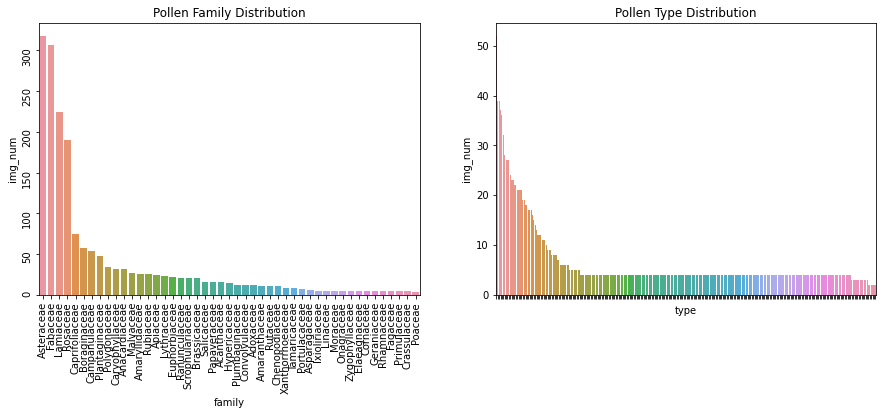

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.barplot(x = 'family', y = 'img_num',data = family_amt_df, ax=ax[0])
sns.barplot(x = 'type', y = 'img_num',data = type_amt_df, ax=ax[1])
ax[0].set(title = 'Pollen Family Distribution')
ax[0].tick_params(labelrotation=90)
ax[1].set(title = 'Pollen Type Distribution')
ax[1].set(xticklabels=[])
plt.show()

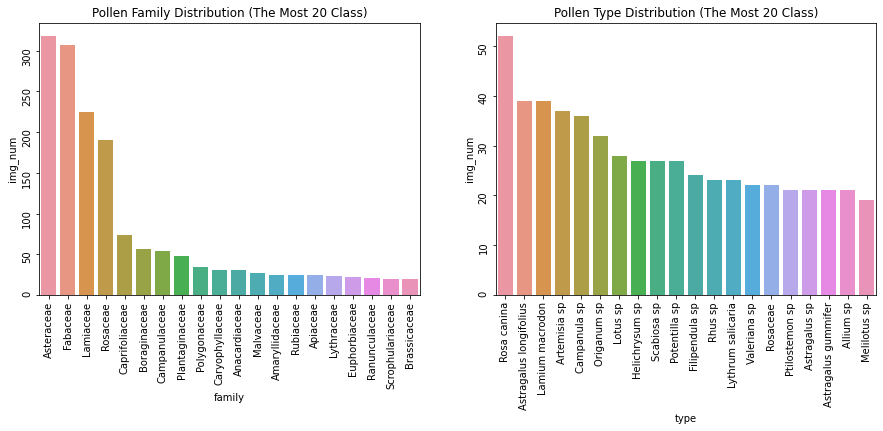

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.barplot(x = 'family', y = 'img_num',data = family_amt_df.iloc[:20], ax=ax[0])
sns.barplot(x = 'type', y = 'img_num',data = type_amt_df.iloc[:20], ax=ax[1])
ax[0].set(title = 'Pollen Family Distribution (The Most 20 Class)')
ax[0].tick_params(labelrotation=90)
ax[1].set(title = 'Pollen Type Distribution (The Most 20 Class)')
ax[1].tick_params(labelrotation=90)
plt.show()

Resize Original Images

In [2]:
from PIL import Image
import os, sys

DATA_ROOT = '/Users/mpekey/Desktop/Mert_SabanciUniv/CS518/HoneyPollenClassification/dataset/'
dirs = os.listdir(DATA_ROOT)

In [6]:
from PIL import Image
import os, sys

DATA_ROOT = '/Users/mpekey/Desktop/Mert_SabanciUniv/CS518/HoneyPollenClassification/dataset/'
NEW_ROOT = '/Users/mpekey/Desktop/Mert_SabanciUniv/CS518/HoneyPollenClassification/dataset_resized/'
dirs = os.listdir(DATA_ROOT)

def resize():
    for item in dirs:
        if os.path.join(DATA_ROOT,item) != '/Users/mpekey/Desktop/Mert_SabanciUniv/CS518/HoneyPollenClassification/dataset/.DS_Store':
            class_dirs = os.listdir(os.path.join(DATA_ROOT,item))
        if not os.path.exists(os.path.join(NEW_ROOT,item)):
            os.makedirs(os.path.join(NEW_ROOT,item))
        for img in class_dirs:
            if os.path.isfile(os.path.join(DATA_ROOT,item,img)):
                im = Image.open(os.path.join(DATA_ROOT,item,img))
                imResize = im.resize((256,256), Image.LANCZOS)
                imResize.save(os.path.join(NEW_ROOT,item,img), 'JPEG')

resize()